In [1]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu

import matplotlib.pyplot as plt

# Input View
#
#  CREATE VIEW DATAIKU_ANALYTICS_SUB.DATA_SCIENCE.NAFCUSTOMER_REVENUE_AGGREGATED
#  AS
#  SELECT
#  CUSTOMER_ID,
#  CUSTOMER,
#  YEAR(REVENUE_DATE) as REVENUE_YEAR,
#  MONTH(REVENUE_DATE) as REVENUE_MONTH,
#  MIN(SETUP_DATE) AS SETUP_DATE,
#  MIN(BI_CUS_PAR) as BI_CUS_PAR,
#  MIN(BI_PRODUCT) as BI_PRODUCT,
#  MIN(BI_MRU) as BI_MRU,
#  SUM(REVENUE_AMOUNT_USD) as REVENUE_AMOUNT_USD,
#  SUM(GROSS_SPEND_AMOUNT) as GROSS_SPEND_AMOUNT,
#  SUM(PURCHASE_GALLONS_QTY) PURCHASE_GALLONS_QTY,
#  SUM(TOTAL_ACTIVE_CARD_COUNT) as TOTAL_ACTIVE_CARD_COUNT
#  FROM DATAIKU_ANALYTICS_SUB.DATA_SCIENCE.NAFCUSTOMER_REVENUE
#  WHERE (FUNDED_BY IS NULL OR FUNDED_BY='Unknown' OR FUNDED_BY='WEX Funded')
#  AND (NOT((REVENUE_CODE='26') AND (CUSTOMER_ID IS NULL)))
#  AND (NOT((REVENUE_CODE='E8') AND (CUSTOMER_ID IS NULL)))
#  GROUP BY 1,2,3,4


from datetime import date, datetime, timedelta
import time

t0 = time.time()

# Read recipe inputs
NAFCUSTOMER_REVENUE_AGGREGATED = dataiku.Dataset("NAFCUSTOMER_REVENUE_AGGREGATED")
NAFCUSTOMER_REVENUE_AGGREGATED_df = NAFCUSTOMER_REVENUE_AGGREGATED.get_dataframe()

t1 = time.time()
print("load duration", (t1-t0)/60.0, "minutes")

print(len(NAFCUSTOMER_REVENUE_AGGREGATED_df))
NAFCUSTOMER_REVENUE_AGGREGATED_df.head()

load duration 6.04992569287618 minutes
18075044


,CUSTOMER_ID,CUSTOMER,REVENUE_YEAR,REVENUE_MONTH,SETUP_DATE,BI_CUS_PAR,BI_PRODUCT,BI_MRU,REVENUE_AMOUNT_USD,GROSS_SPEND_AMOUNT,PURCHASE_GALLONS_QTY,TOTAL_ACTIVE_CARD_COUNT
0,77487332.0,REA ACCOUNTING,2022,7,2021-08-27 07:00:00+00:00,11200.0,15308.0,4000.0,17.79,244.32,32.319,2.0
1,77276079.0,HELPING OUT PEOPLE ENVIRONMENTS LLC,2022,12,2011-07-22 07:00:00+00:00,32600.0,15100.0,4120.0,32.51,2330.82,850.612,2.0
2,77626898.0,WALLEY TRACTOR SERVICE,2022,6,2021-09-21 07:00:00+00:00,53000.0,10100.0,4120.0,43.63,1861.50,319.709,2.0
3,77188826.0,DORR TRUCK SALES LLC,2020,11,2012-12-17 08:00:00+00:00,13000.0,15100.0,4000.0,0.00,0.00,0.000,0.0
4,77604036.0,TROPICAL GREENERY INC,2019,6,2006-02-28 08:00:00+00:00,10500.0,10100.0,3100.0,46.10,1457.48,602.707,15.0


In [19]:
print(len(NAFCUSTOMER_REVENUE_AGGREGATED_df))
df = NAFCUSTOMER_REVENUE_AGGREGATED_df

18075044


In [21]:
# cast year as integer, create a revenue date column at the monthly grain
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype('Int64')
df['SETUP_DATE_DT'] = pd.to_datetime(df['SETUP_DATE'])

df['REVENUE_YEAR'] = df['REVENUE_YEAR'].astype('Int64')
df['REVENUE_DATE'] = df['REVENUE_MONTH'].astype(str) + '-' + df['REVENUE_YEAR'].astype(str)
df['REVENUE_DATE'] = pd.to_datetime(df['REVENUE_DATE'], format='%m-%Y').dt.strftime('%m-%Y')

print(len(df))
df = df[df.REVENUE_YEAR!=2023]
print(len(df))
df.head()

/data/dataiku/dss_data/code-envs/python/env_clc/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/dataiku/dss_data/code-envs/python/env_clc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/data/dataiku/dss_data/code-envs/python/env_clc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

17673397
17673397


,CUSTOMER_ID,CUSTOMER,REVENUE_YEAR,REVENUE_MONTH,SETUP_DATE,BI_CUS_PAR,BI_PRODUCT,BI_MRU,REVENUE_AMOUNT_USD,GROSS_SPEND_AMOUNT,PURCHASE_GALLONS_QTY,TOTAL_ACTIVE_CARD_COUNT,REVENUE_DATE,SETUP_DATE_DT
0,77487332,REA ACCOUNTING,2022,7,2021-08-27 07:00:00+00:00,11200.0,15308.0,4000.0,17.79,244.32,32.319,2.0,07-2022,2021-08-27 07:00:00+00:00
1,77276079,HELPING OUT PEOPLE ENVIRONMENTS LLC,2022,12,2011-07-22 07:00:00+00:00,32600.0,15100.0,4120.0,32.51,2330.82,850.612,2.0,12-2022,2011-07-22 07:00:00+00:00
2,77626898,WALLEY TRACTOR SERVICE,2022,6,2021-09-21 07:00:00+00:00,53000.0,10100.0,4120.0,43.63,1861.50,319.709,2.0,06-2022,2021-09-21 07:00:00+00:00
3,77188826,DORR TRUCK SALES LLC,2020,11,2012-12-17 08:00:00+00:00,13000.0,15100.0,4000.0,0.00,0.00,0.000,0.0,11-2020,2012-12-17 08:00:00+00:00
4,77604036,TROPICAL GREENERY INC,2019,6,2006-02-28 08:00:00+00:00,10500.0,10100.0,3100.0,46.10,1457.48,602.707,15.0,06-2019,2006-02-28 08:00:00+00:00


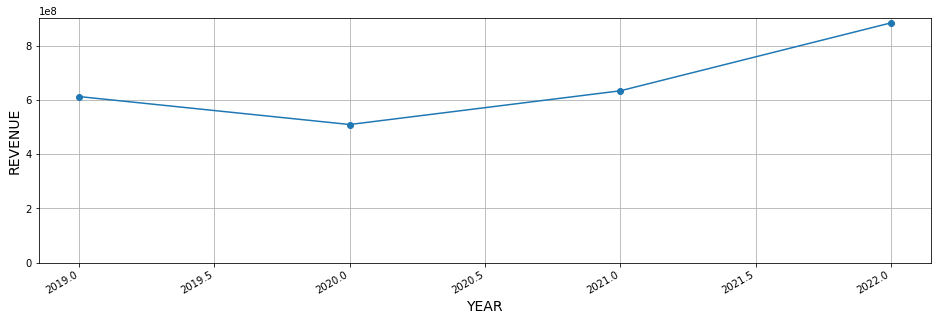

,REVENUE_YEAR,REVENUE_AMOUNT_USD
0,2019,6.118864e+08
1,2020,5.089365e+08
2,2021,6.331536e+08
3,2022,8.833021e+08


In [22]:
import matplotlib.dates as mdates

# aggregate revenue at annual grain
df_revenue_per_year = df.groupby(['REVENUE_YEAR']).REVENUE_AMOUNT_USD.sum().reset_index()

# plot out 
fig, ax1 = plt.subplots(figsize=(16,5))
ax1.plot(df_revenue_per_year['REVENUE_YEAR'],df_revenue_per_year['REVENUE_AMOUNT_USD'], marker='o')
ax1.set_xlabel('YEAR', fontsize=14)
ax1.set_ylabel('REVENUE', fontsize=14)
ax1.grid()
ax1.set_ylim(ymin=0)
fig.autofmt_xdate()
#ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.show()

df_revenue_per_year.head()

In [23]:
# aggregate customers at min setup date
df_customer_min_setup = df.groupby(['CUSTOMER_ID']).SETUP_DATE.min().reset_index()
df_customer_min_setup.columns = ['CUSTOMER_ID','MIN_SETUP_DATE']
df_customer_min_setup.head()

,CUSTOMER_ID,MIN_SETUP_DATE
0,77000000,2012-10-29 07:00:00+00:00
1,77000001,2022-04-12 07:00:00+00:00
2,77000002,2018-10-25 07:00:00+00:00
3,77000003,2022-06-08 07:00:00+00:00
4,77000004,2018-08-20 07:00:00+00:00


In [26]:
df_customer_min_setup.CUSTOMER_ID.value_counts(dropna=False)

77596671    1
77288896    1
77295047    1
77292998    1
77299141    1
           ..
77187692    1
77197931    1
77199978    1
77193833    1
77594624    1
Name: CUSTOMER_ID, Length: 650886, dtype: int64

In [24]:
print(len(df))
df = pd.merge(df, df_customer_min_setup, on='CUSTOMER_ID', how='inner')
print(len(df))
df.head()

17673397


ValueError: cannot convert to 'int64'-dtype NumPy array with missing values. Specify an appropriate 'na_value' for this dtype.

In [17]:
print(len(df))
# retain only those customers that already existed before the analysis period
df = df[df.MIN_SETUP_DATE.dt.year<2019]
print(len(df))
df.head()

12664978
12664978


,CUSTOMER_ID,CUSTOMER,REVENUE_YEAR,REVENUE_MONTH,SETUP_DATE,BI_CUS_PAR,BI_PRODUCT,BI_MRU,REVENUE_AMOUNT_USD,GROSS_SPEND_AMOUNT,PURCHASE_GALLONS_QTY,TOTAL_ACTIVE_CARD_COUNT,REVENUE_DATE,SETUP_DATE_DT,MIN_SETUP_DATE
0,77276079,HELPING OUT PEOPLE ENVIRONMENTS LLC,2022,12,2011-07-22 07:00:00+00:00,32600.0,15100.0,4120.0,32.51,2330.82,850.612,2.0,12-2022,2011-07-22 07:00:00+00:00,2011-07-22 07:00:00+00:00
1,77276079,HELPING OUT PEOPLE ENVIRONMENTS LLC,2022,2,2011-07-22 07:00:00+00:00,32600.0,15100.0,4120.0,379.29,2781.59,843.785,3.0,02-2022,2011-07-22 07:00:00+00:00,2011-07-22 07:00:00+00:00
2,77276079,HELPING OUT PEOPLE ENVIRONMENTS LLC,2019,5,2011-07-22 07:00:00+00:00,32600.0,15100.0,4120.0,42.29,2618.81,1007.123,3.0,05-2019,2011-07-22 07:00:00+00:00,2011-07-22 07:00:00+00:00
3,77276079,HELPING OUT PEOPLE ENVIRONMENTS LLC,2021,6,2011-07-22 07:00:00+00:00,32600.0,15100.0,4120.0,41.30,3149.39,1138.024,3.0,06-2021,2011-07-22 07:00:00+00:00,2011-07-22 07:00:00+00:00
4,77276079,HELPING OUT PEOPLE ENVIRONMENTS LLC,2020,6,2011-07-22 07:00:00+00:00,32600.0,15100.0,4120.0,109.92,1135.56,589.732,3.0,06-2020,2011-07-22 07:00:00+00:00,2011-07-22 07:00:00+00:00


In [18]:
df.MIN_SETUP_DATE.dt.year.value_counts()

2018    4273281
2017    1400950
2016     821746
2014     786289
2015     780487
2012     739035
2013     717573
2011     389079
2010     316850
2009     313200
2008     236847
2006     229593
2005     217217
2004     206236
2007     202823
2003     146974
2001     133438
2002     123025
2000      96469
1999      71630
1998      70251
1997      57848
1992      41987
1996      40409
1995      31451
1994      30604
1993      26860
1990      15453
1991      15272
1989      14844
1988      14141
1987      13381
1985      10079
1986       9426
1984       9166
1983       7384
1970       7342
1980       3443
1976       3337
1982       3288
1981       2981
1962       2938
1978       2900
1975       2886
1979       2613
1977       2611
1972       2599
1973       2437
1974       2406
1971       2031
1964       1563
1965       1426
1969       1312
1961       1204
1968       1030
1967        987
1966        785
1963        757
1956        167
1960        152
1957        105
1953         83
1955    

In [0]:
# Compute recipe outputs from inputs
# TODO: Replace this part by your actual code that computes the output, as a Pandas dataframe
# NB: DSS also supports other kinds of APIs for reading and writing data. Please see doc.

#TENURE_CALC_df = NAFCUSTOMER_REVENUE_AGGREGATED_df # For this sample code, simply copy input to output


# Write recipe outputs
#TENURE_CALC = dataiku.Dataset("TENURE_CALC")
#TENURE_CALC.write_with_schema(TENURE_CALC_df)